# The SVM's
hw 4

## Imports

In [1]:
# basic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data manipulation
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# models
from sklearn.svm import SVC, SVR

# preset data
from sklearn.datasets import load_breast_cancer

## Confusion function

In [2]:
def print_conf_matrix(confusion_matrix, conf_title, class_labels):
    fig, ax = plt.subplots()
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_labels, yticklabels=class_labels)
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_ticks_position("top")
    plt.tight_layout()
    plt.title(conf_title, y=1.15);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

## Split and Train SVC function

In [3]:
def train_svc (x, y, kernel:str, penalty = 10, gamma="auto", test_size = 0.2):
    # print("train_shape:" , x_decomp.shape) # Debug line
    
    # --- SPLIT DATA
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = test_size, random_state=20)
    # print("x training size: ", x_train.shape)   # Debug line
    # print("y training size: ", y_train.shape)   # Debug line
    # print("x test size: ", x_test.shape)   # Debug line
    # print("y test size: ", y_test.shape)   # Debug line

    # --- TRAIN MODEL
    classifier = SVC(kernel=kernel, C=penalty, gamma=gamma)
    classifier.fit(x_train, y_train)

    # --- REPORT DATA
    y_pred = classifier.predict(x_test)
    
    return y_test , y_pred

## Split and Train SVR function

In [4]:
def train_svr (x, y, kernel:str, penalty = 10, gamma="auto", epsilon=0.1, test_size = 0.2):
    # print("train_shape:" , x_decomp.shape) # Debug line
    
    # --- SPLIT DATA
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = test_size, random_state=20)
    # print("x training size: ", x_train.shape)   # Debug line
    # print("y training size: ", y_train.shape)   # Debug line
    # print("x test size: ", x_test.shape)   # Debug line
    # print("y test size: ", y_test.shape)   # Debug line

    # --- TRAIN MODEL
    classifier = SVR(kernel=kernel, C=penalty, gamma=gamma, epsilon=epsilon)
    # print(classifier)
    classifier.fit(x_train, y_train)

    # --- REPORT DATA
    y_pred = classifier.predict(x_test)
    
    return y_test , y_pred

# Part 1
SVM

## Setup

In [5]:
q_num = "Q1: SVC"

In [6]:
dataset = load_breast_cancer()

In [7]:
cancer_data = dataset.data
cancer_data.shape

(569, 30)

In [8]:
cancer_labels = dataset.target
cancer_labels = np.reshape(cancer_labels,(len(cancer_labels),1))
cancer_labels.shape

(569, 1)

In [9]:
cancer_data = np.concatenate([cancer_data,cancer_labels],axis=1)
cancer_data.shape

(569, 31)

In [10]:
cancer_df = pd.DataFrame(cancer_data)
cancer_df.columns = np.append(dataset.feature_names, 'target')
print(f'Shape: {cancer_df.shape}')
cancer_df.tail()

Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [11]:
features = cancer_df.columns.values

In [12]:
class_names=['Benign' , 'Malignant'] # name of classes
def remap_labels(data_series):
    data_series.replace(0, class_names[0],inplace=True)
    data_series.replace(1, class_names[1],inplace=True)

In [13]:
# remap_labels(cancer_df['target'])
# cancer_df.tail()

In [14]:
x_df = cancer_df.copy()
y_df = x_df.pop("target")
x = x_df.copy().values
y = y_df.copy().values

In [15]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"{features.shape} with values of", features)

x shape: (569, 30)
y shape: (569,)
(31,) with values of ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
 'target']


In [16]:
scaler = MinMaxScaler()
# scaler = StandardScaler()

x = scaler.fit_transform(x)

## Decomposition

In [17]:
class_names=['Benign' , 'Malignant'] # name of classes
confusion_list = list()
report_list = list()
report_list_string = list()

# linear at 8 dimensions and penalty = 50
# ---- one wrong
# rbf at 5 dimensions and penalty of 100
# ---- perfect

for num_components in range(1, (x.shape)[1] + 1):
    column_components = ['Component ' + str(item)   for item in range(1 , num_components + 1)]
    print(f"{num_components} Component PCA ({q_num})" + '\n')
    
    # --- DECOMPOSE
    pca = PCA(n_components=num_components)
    principalComponents = pca.fit_transform(x.copy())
    principal_df = pd.DataFrame(data = principalComponents, 
                            columns = column_components
                )
    print('PCA shape:' , principalComponents.shape)
    
    
    # --- DATA FRAME
    decomp_df = pd.concat([principal_df, y_df.copy()], axis = 1)
    print(decomp_df) 
    print('\n')
    
    
    # --- CONVERT DATA FROM DATA FRAME 
    x_decomp = decomp_df
    y_decomp = x_decomp.pop('target')
    x_decomp = x_decomp.values
    y_decomp = y_decomp.values
    # print(f"x shape: {x_decomp.shape}") 
    # print(x_decomp)
    # print(f"y shape: {y_decomp.shape}")
    # print(y_decomp)
    
    y_test , y_pred = train_svc(x_decomp, y_decomp, 'rbf', 100)
    
    
    print(metrics.classification_report(y_test, y_pred, digits=4, output_dict=False))
    
    report_list_string.append(metrics.classification_report(y_test, y_pred, digits=4))
    report_list.append(metrics.classification_report(y_test, y_pred, output_dict=True))
    confusion_list.append(metrics.confusion_matrix(y_test, y_pred))
    
   
    print('\n' + '-'*75  +  '\n')

1 Component PCA (Q1: SVC)

PCA shape: (569, 1)
     Component 1  target
0       1.387021     0.0
1       0.462308     0.0
2       0.954621     0.0
3       1.000816     0.0
4       0.626828     0.0
..           ...     ...
564     1.002840     0.0
565     0.620757     0.0
566     0.226311     0.0
567     1.677834     0.0
568    -0.905068     1.0

[569 rows x 2 columns]


              precision    recall  f1-score   support

         0.0     0.9767    0.8750    0.9231        48
         1.0     0.9155    0.9848    0.9489        66

    accuracy                         0.9386       114
   macro avg     0.9461    0.9299    0.9360       114
weighted avg     0.9413    0.9386    0.9380       114


---------------------------------------------------------------------------

2 Component PCA (Q1: SVC)

PCA shape: (569, 2)
     Component 1  Component 2  target
0       1.387021     0.426895     0.0
1       0.462308    -0.556947     0.0
2       0.954621    -0.109701     0.0
3       1.000816     1.

In [18]:
accuracy_list = list()
precision_list = list()
recall_list = list()

for report in report_list:
    accuracy_list.append(  report["accuracy"]                    )
    precision_list.append((report["weighted avg"])['precision']  )
    recall_list.append(   (report["weighted avg"])['recall']     )

## Output

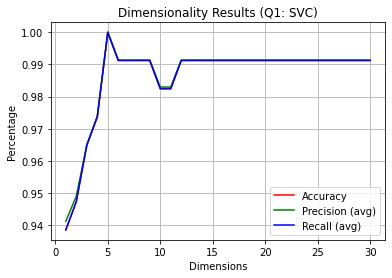

In [19]:
# print report_list stats
plt.figure(1)
plt.plot(range(1, len(accuracy_list)+1) , accuracy_list , color='r')
plt.plot(range(1, len(precision_list)+1) , precision_list , color='g')
plt.plot(range(1, len(recall_list)+1) , recall_list , color='b')
plt.grid() 
plt.xlabel('Dimensions') 
plt.ylabel('Percentage') 
plt.legend(["Accuracy", "Precision (avg)", "Recall (avg)"])
plt.title(f"Dimensionality Results ({q_num})") ;

In [20]:
inspect_dimension = 5


# print('\t\t', inspect_dimension, "Dimension Report\n")
print(report_list_string[inspect_dimension-1])
# print_conf_matrix(confusion_list[inspect_dimension - 1], f"Confusion Matrix of {inspect_dimension} dimensions ({q_num})", class_names)

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        48
         1.0     1.0000    1.0000    1.0000        66

    accuracy                         1.0000       114
   macro avg     1.0000    1.0000    1.0000       114
weighted avg     1.0000    1.0000    1.0000       114



# Part 2
SVR

## Setup

In [21]:
q_num = "Q2: SVR"

In [22]:
housing_df = pd.DataFrame(pd.read_csv('Housing.csv'))
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
print(f"shape = {np.shape(housing_df)}")

# creates a list of all variables from the column names
feature_list = list( housing_df.columns )

print(f"features are: {feature_list}")

shape = (545, 13)
features are: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [24]:
# Maps to turn categorys into numbers 
def boolean_map(x):
    return x.map({'yes': 1 , 'no': 0})
def furnish_map(x):
    return x.map({'furnished': 1 , 'semi-furnished': 0.5 , 'unfurnished': 0})

# Extracts the yes and no column names
binary_vars = [*feature_list[5:10], feature_list[11]]
print(f"binary vars = {binary_vars}")

# Extracts the furnishing column names
furnish_vars = [feature_list[12]]
print(f"furnish vars = {furnish_vars}")

# Extracts the column names that are actual values
valued_vars = feature_list.copy()
[valued_vars.remove( item ) for item in binary_vars]
[valued_vars.remove( item ) for item in furnish_vars]
print(f"value vars = {valued_vars}")

binary vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnish vars = ['furnishingstatus']
value vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [25]:
x_df = housing_df.copy()

## scale data
scaler = StandardScaler()
# scaler = MinMaxScaler()

x_df[valued_vars] = scaler.fit_transform(x_df[valued_vars])

## map text values
x_df[binary_vars] = x_df[binary_vars].apply(boolean_map)
x_df[furnish_vars] = x_df[furnish_vars].apply(furnish_map)

## make y_df
y_df = x_df.pop('price')


In [26]:
# input_values = valued_vars.copy()
# input_values.remove('price')


# x_df = x_df[input_values]

In [27]:
x_df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1.0
1,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1.0
2,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0.5
3,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1.0
4,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1.0


In [28]:
y_df.head()

0    4.566365
1    4.004484
2    4.004484
3    3.985755
4    3.554979
Name: price, dtype: float64

## Decomposition Function

In [73]:
def decompose_and_train_SVR(kernel:str):
    r2_score_list = list()

    for num_components in range(1, (x_df.shape)[1] + 1):
        column_components = ['Component ' + str(item)   for item in range(1 , num_components + 1)]
        print(f"{num_components} Component PCA for {kernel} ({q_num})" + '\n')

        # --- DECOMPOSE
        pca = PCA(n_components=num_components)
        principalComponents = pca.fit_transform(x_df.copy().values)
        print('PCA shape:' , principalComponents.shape)

        # confusion list
        # confusion_list.append(metrics.confusion_matrix(y_test, y_pred))

        # output
        y_test , y_pred = train_svr(principalComponents, y_df.copy().values, kernel, 1)

        # report string
        report = metrics.r2_score(y_test, y_pred)
        r2_score_list.append(report)
        print("R2 score: ", report)

        print('\n' + '-'*75  +  '\n')
    return r2_score_list

## Output

In [74]:
def graph_r2_v_dimensionality(r2_list, kernel_str:str, color = 'r'):
    # print report_list stats
    plt.figure()
    plt.plot(range(1, len(r2_list)+1) , r2_list , color=color)
    plt.grid() 
    plt.xlabel('Dimensions') 
    plt.ylabel('Percentage') 
    plt.legend(["R2_score"])
    plt.title(f"Dimensionality Results of {kernel_str} ({q_num})") ;

{}

Kernel is rbf 

1 Component PCA for rbf (Q2: SVR)

PCA shape: (545, 1)
R2 score:  0.5147148228796905

---------------------------------------------------------------------------

2 Component PCA for rbf (Q2: SVR)

PCA shape: (545, 2)
R2 score:  0.5044366276959353

---------------------------------------------------------------------------

3 Component PCA for rbf (Q2: SVR)

PCA shape: (545, 3)
R2 score:  0.47221888968892345

---------------------------------------------------------------------------

4 Component PCA for rbf (Q2: SVR)

PCA shape: (545, 4)
R2 score:  0.5534099662395684

---------------------------------------------------------------------------

5 Component PCA for rbf (Q2: SVR)

PCA shape: (545, 5)
R2 score:  0.5599779458204446

---------------------------------------------------------------------------

6 Component PCA for rbf (Q2: SVR)

PCA shape: (545, 6)
R2 score:  0.5916471914402424

---------------------------------------------------------------------------

7

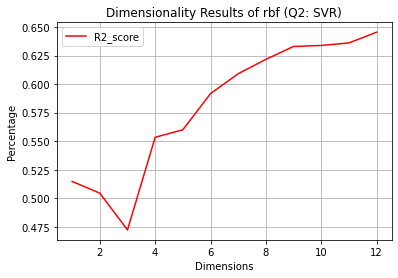

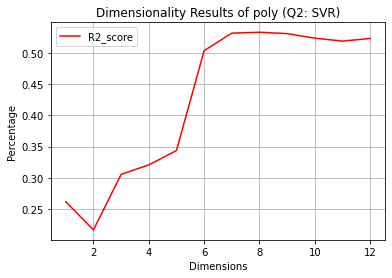

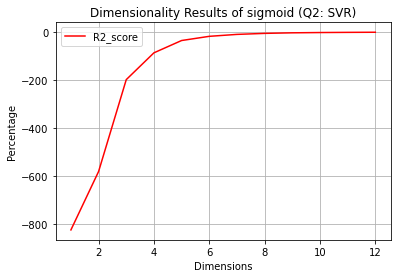

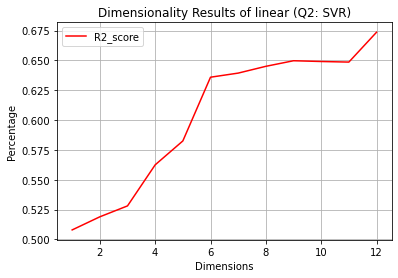

In [75]:
useable_kernels = ['rbf', 'poly', 'sigmoid', 'linear']
results = dict()

print(results)

for kernel in useable_kernels:
    print('\nKernel is', kernel, '\n')
    
    results[kernel] = decompose_and_train_SVR(kernel)
    
    graph_r2_v_dimensionality(results[kernel], kernel)
    
    print('#'*50)
print(kernel)

In [76]:
inspect_dimension = 12
inspect_kernel = 'sigmoid'

print((results[inspect_kernel])[inspect_dimension-1])

0.2519643038298679
